# Data Exploration

In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from tqdm import tqdm

import torchaudio
from sklearn.model_selection import train_test_split

import os
import sys
#import tensorflow_hub as hub

/home/yangya/anaconda3/envs/ML/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## The overview of all data

In [107]:
import csv
#load data from train_metadata
data = pd.read_csv("/home/yangya/桌面/project/train_metadata.csv/train_metadata.csv",engine='python')
data.head()

primary_label secondary_labels              type  latitude  longitude  \
0       abethr1               []          ['song']    4.3906    38.2788   
1       abethr1               []          ['call']   -2.9524    38.2921   
2       abethr1               []          ['song']   -2.9524    38.2921   
3       abethr1               []          ['song']   -2.9524    38.2921   
4       abethr1               []  ['call', 'song']   -2.9524    38.2921   

      scientific_name               common_name         author  \
0  Turdus tephronotus  African Bare-eyed Thrush  Rolf A. de By   
1  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
2  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
3  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
4  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   

                                             license  rating  \
0  Creative Commons Attribution-NonCommercial-Sha...     4.0   
1  Creative Commons Attribution-NonCommercial-Sha...     3.5   
2  Creative Commons Attribution-NonCommercial-Sha...     3.5   
3  Creative Commons Attribution-NonCommercial-Sha...     5.0   
4  Creative Commons Attribution-NonCommercial-Sha...     4.5   

                                 url              filename  
0  https://www.xeno-canto.org/128013  abethr1/XC128013.ogg  
1  https://www.xeno-canto.org/363501  abethr1/XC363501.ogg  
2  https://www.xeno-canto.org/363502  abethr1/XC363502.ogg  
3  https://www.xeno-canto.org/363503  abethr1/XC363503.ogg  
4  https://www.xeno-canto.org/363504  abethr1/XC363504.ogg

In [3]:
len(pd.unique(data['primary_label']))#The data contains 264 classes of birds

264

In [108]:
all_class_labels=list(data.index)

## Visulaize the distribution of each species (pie chart)

In [14]:
#print("primary_label: ",data["primary_label"].unique())
print()
datagroup = data.groupby("primary_label").count()
datagroup

secondary_labels  type  latitude  longitude  scientific_name  \
primary_label                                                                 
abethr1                      15    15        14         14               15   
abhori1                     126   126       126        126              126   
abythr1                      28    28        28         28               28   
afbfly1                      18    18        18         18               18   
afdfly1                      31    31        31         31               31   
...                         ...   ...       ...        ...              ...   
yertin1                     134   134       133        133              134   
yesbar1                      29    29        29         29               29   
yespet1                      15    15        15         15               15   
yetgre1                      27    27        27         27               27   
yewgre1                     108   108       108        108              108   

               common_name  author  license  rating  url  filename  
primary_label                                                       
abethr1                 15      15       15      15   15        15  
abhori1                126     126      126     126  126       126  
abythr1                 28      28       28      28   28        28  
afbfly1                 18      18       18      18   18        18  
afdfly1                 31      31       31      31   31        31  
...                    ...     ...      ...     ...  ...       ...  
yertin1                134     134      134     134  134       134  
yesbar1                 29      29       29      29   29        29  
yespet1                 15      15       15      15   15        15  
yetgre1                 27      27       27      27   27        27  
yewgre1                108     108      108     108  108       108  

[264 rows x 11 columns]

In [15]:
print(type(datagroup))

<class 'pandas.core.frame.DataFrame'>


In [28]:
sum_ = datagroup['secondary_labels'].sum()
distri = datagroup['secondary_labels']/float(sum_)
class_labels = list(datagroup.index)

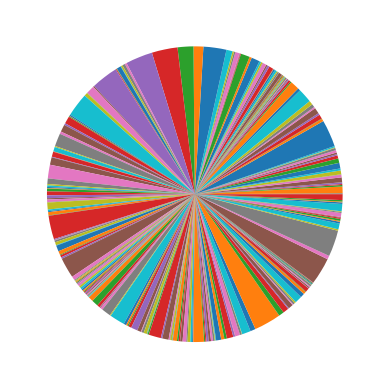

In [27]:
import matplotlib.pyplot as plt
import numpy as np

y=np.array([35,25,25,15])
plt.pie(distri)#autopct="%.2f%%")#labels=class_labels)
plt.show()

## An example of resample audio

In [9]:
import torchaudio
import librosa
import IPython.display as ipd
file_prefix = "/home/yangya/桌面/project/train_audio/"
idx = np.random.randint(0,len(data))
sample = data.iloc[idx]
path = file_prefix + sample["filename"]
label = sample["primary_label"]
print()

speech,sr = torchaudio.load(path)
speech = speech[0].numpy().squeeze()
speech = librosa.resample(np.asarray(speech),orig_sr=sr,target_sr=16000)
ipd.Audio(data=np.asarray(speech),autoplay=True,rate=16000)

In [10]:
print(type(speech))

<class 'torch.Tensor'>


## The visualization of Duration time(seconds) distribution of each species

In [110]:
def getduration(i): 
    """
    display waveform of a given speech sample
    :param sample_name: speech sample name
    :param fs: sample frequency
    :return:
    """
    file_prefix = "/home/yangya/桌面/project/train_audio/"
    idx = i
    sample = data.iloc[idx]
    path = file_prefix + sample["filename"]
    samples, sr = librosa.load(path, sr=16000)
    # samples = samples[6000:16000]
    avg_amp =librosa.get_duration(y=samples,sr=sr)
    return avg_amp

In [111]:
getduration(3)

29.2571875

In [112]:
data_avg1 = {}
for i in range(len(class_labels)):
    data_avg1[class_labels[i]] = []
for i in range(len(data)):
    temp = getduration(i)
    label = data['primary_label'][i]
    data_avg1[label].append(temp)

In [118]:
df1_1=[]
for i in range(len(class_labels)):
    df1_1.append(data_avg1[class_labels[i]])
print(len(class_labels))
print(len(df1_1))
df1_2=df1_1[:40]
df1_3=df1_1[41:80]
df1_4=df1_1[81:120]
df1_5=df1_1[121:160]
df1_6=df1_1[161:220]
df1_7=df1_1[221:264]

264
264


<AxesSubplot:>

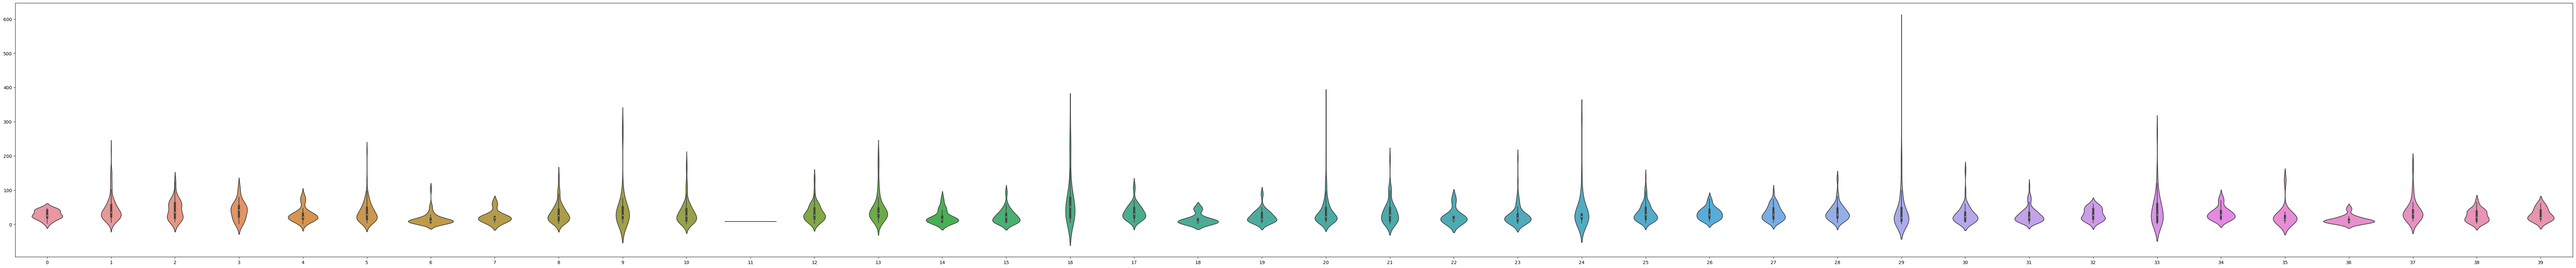

In [119]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df1_2)

<AxesSubplot:>

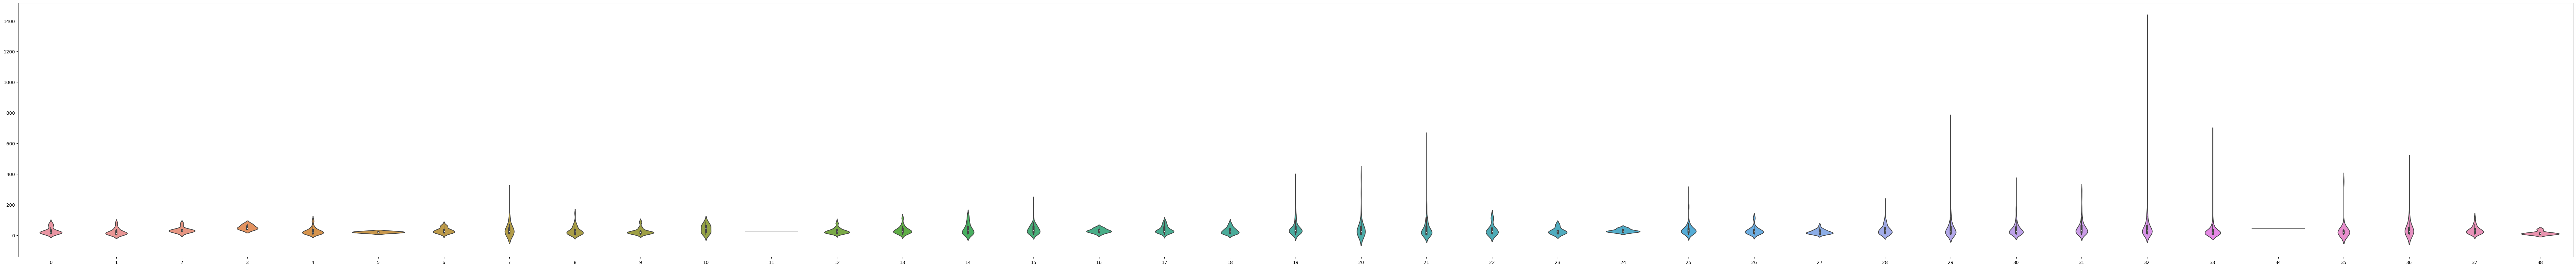

In [120]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df1_3)

<AxesSubplot:>

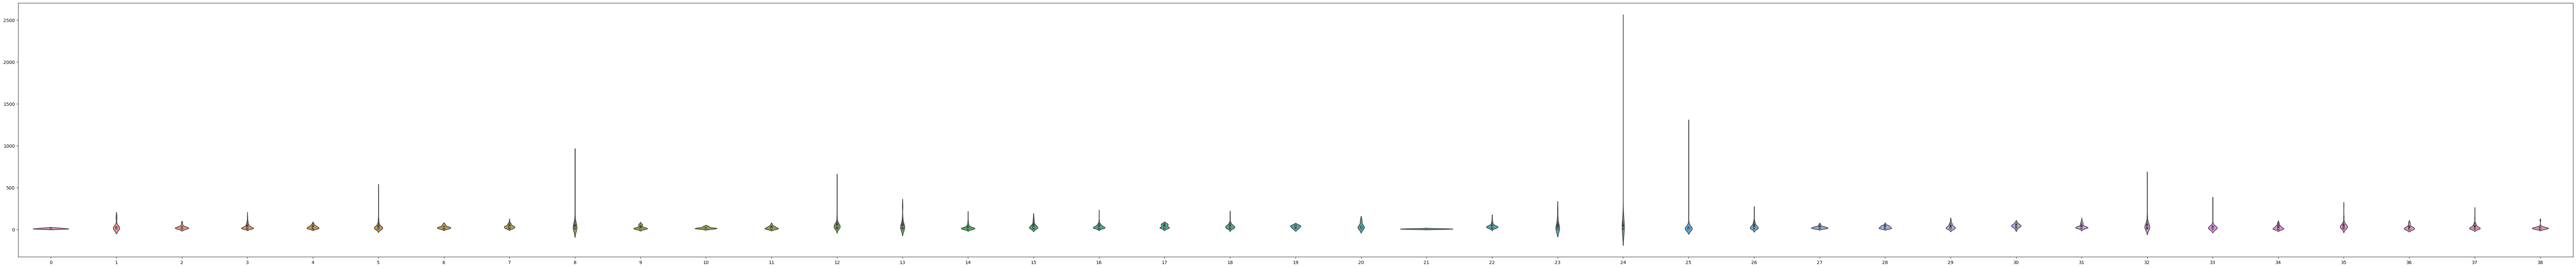

In [121]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df1_4)

<AxesSubplot:>

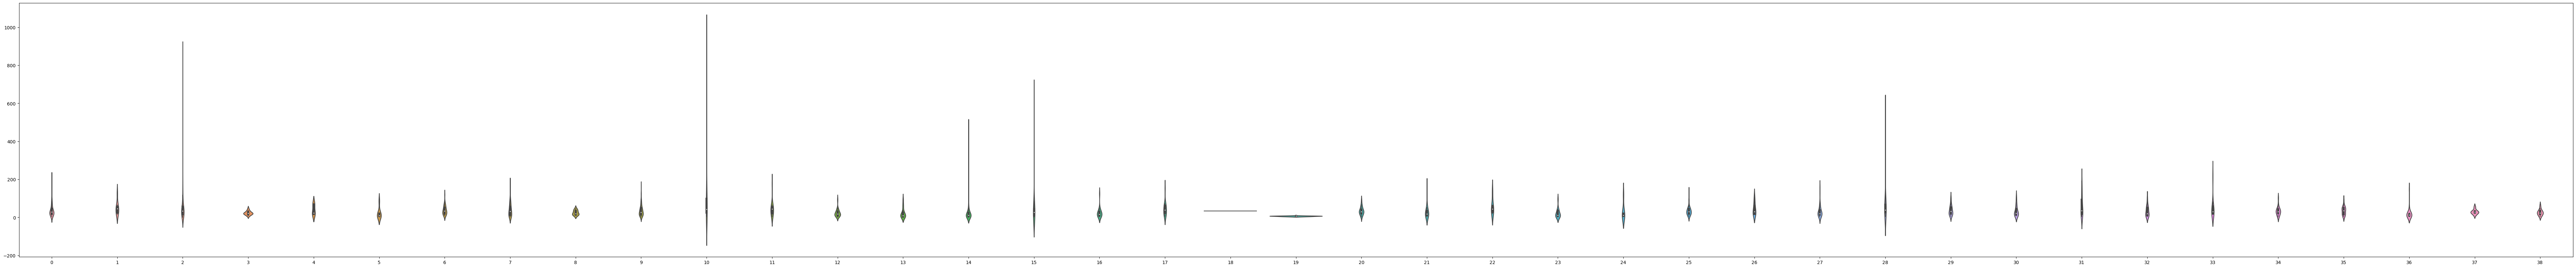

In [122]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df1_5)

<AxesSubplot:>

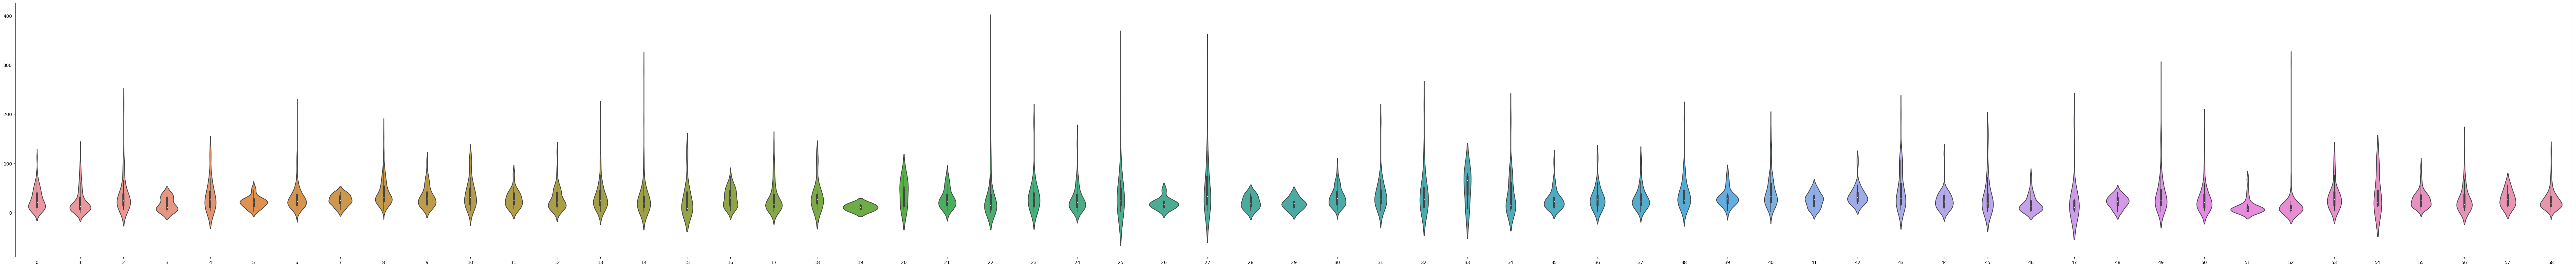

In [123]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df1_6)

<AxesSubplot:>

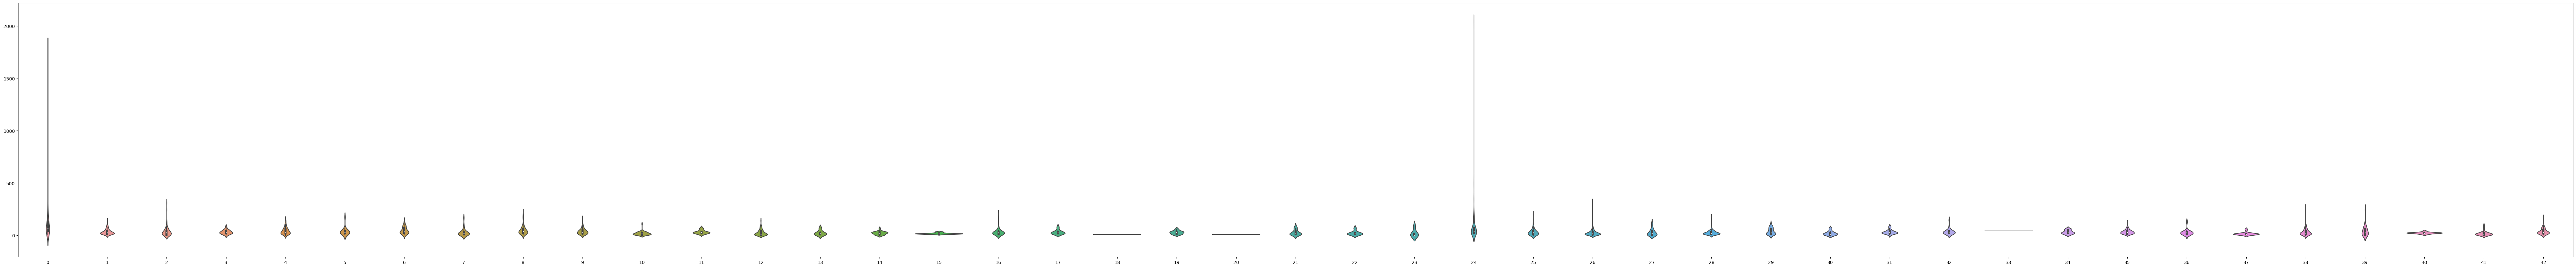

In [124]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df1_7)

## The visualization of average mfcc distribution of each species

#### An example of visualizing the mfcc features of a sample

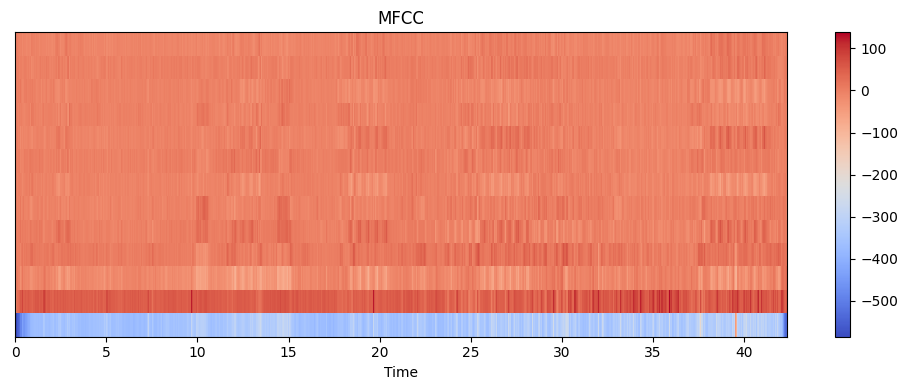

In [133]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 加载一个音频文件
file_prefix = "/home/yangya/桌面/project/train_audio/"
idx = 4
sample = data.iloc[idx]
path = file_prefix + sample["filename"]
y, sr = librosa.load(path)

# 计算 MFCC 特征
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 计算时间轴
times = librosa.times_like(mfccs)

# 绘制热图
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=512,
                         x_coords=times)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [135]:
def get_mean_mfcc(i):
    ile_prefix = "/home/yangya/桌面/project/train_audio/"
    idx = i
    sample = data.iloc[idx]
    path = file_prefix + sample["filename"]
    y, sr = librosa.load(path)

# 计算 MFCC 特征
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return (mfccs.mean())

In [136]:
data_avg2 = {}
for i in range(len(class_labels)):
    data_avg2[class_labels[i]] = []
for i in range(len(data)):
    temp = get_mean_mfcc(i)
    label = data['primary_label'][i]
    data_avg2[label].append(temp)

In [137]:
df2_1=[]
for i in range(len(class_labels)):
    df2_1.append(data_avg2[class_labels[i]])

In [138]:
print(len(class_labels))
print(len(df2_1))
df2_2=df2_1[:40]
df2_3=df2_1[41:80]
df2_4=df2_1[81:120]
df2_5=df2_1[121:160]
df2_6=df2_1[161:220]
df2_7=df2_1[221:264]

264
264


<AxesSubplot:>

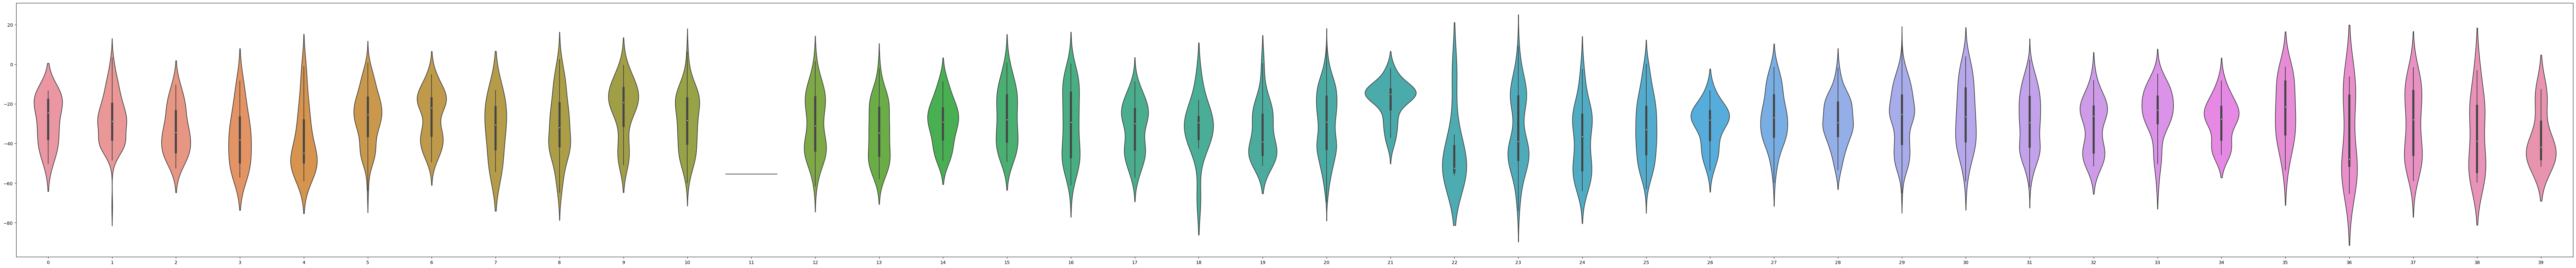

In [139]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df2_2)

<AxesSubplot:>

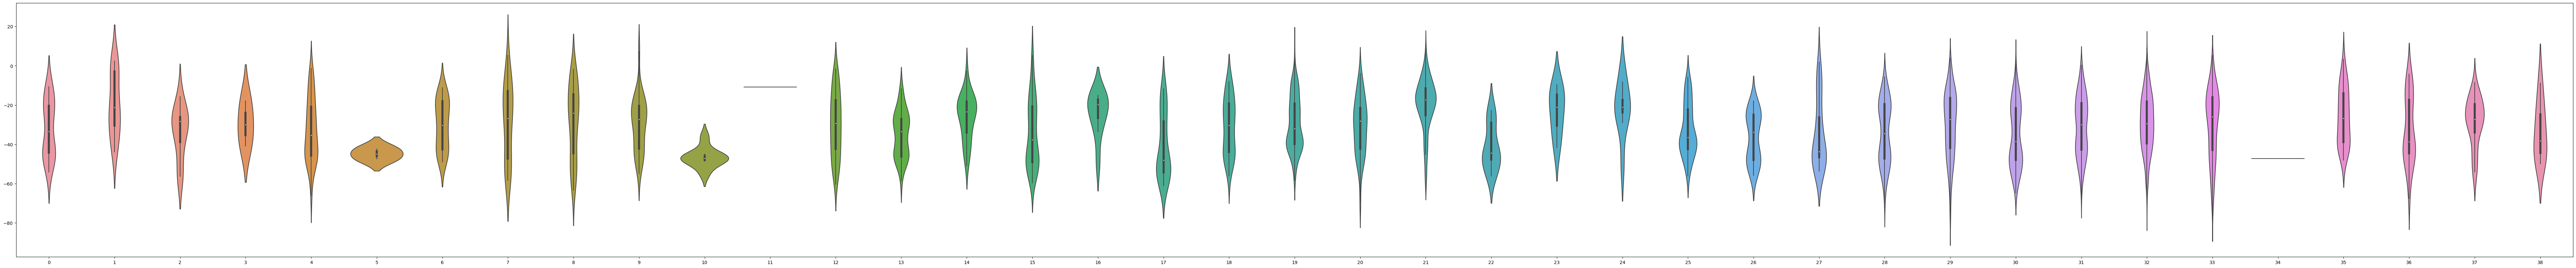

In [140]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df2_3)

<AxesSubplot:>

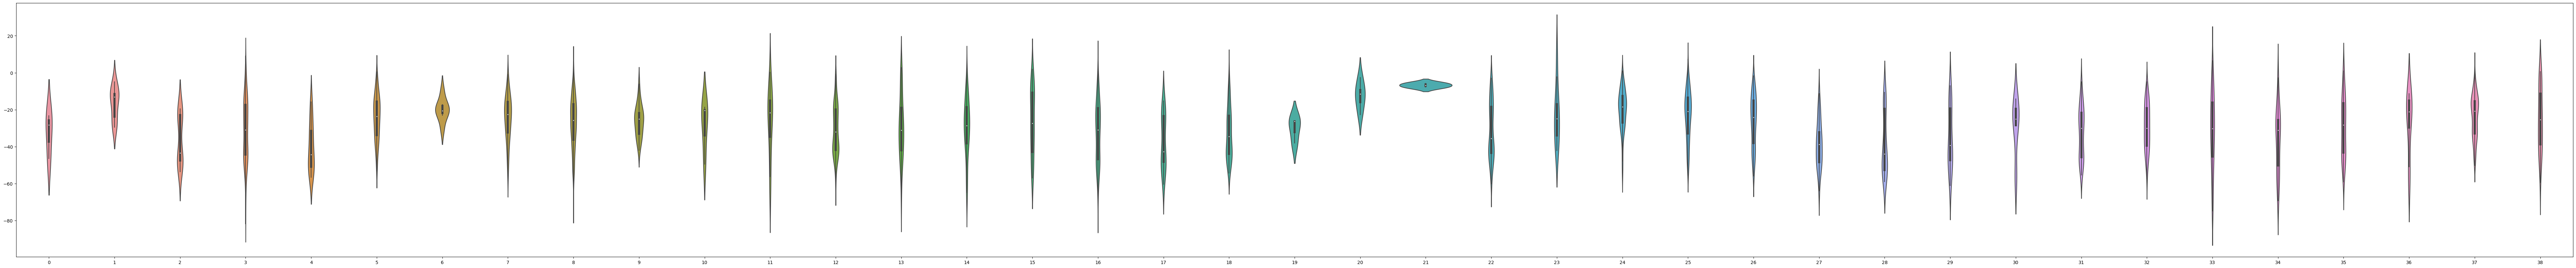

In [141]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df2_4)

<AxesSubplot:>

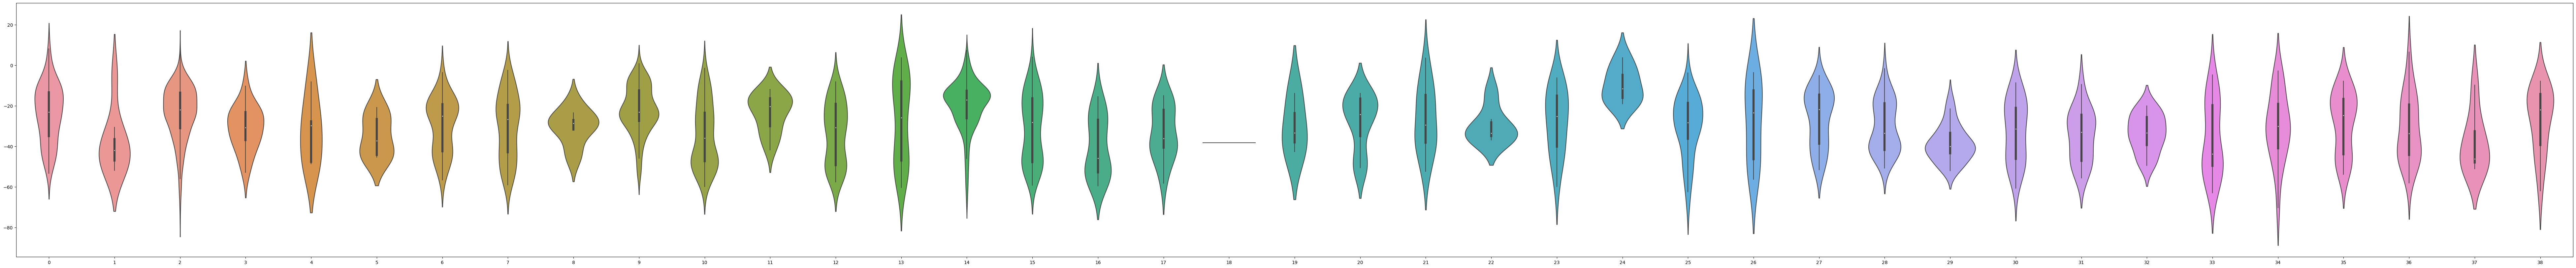

In [142]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df2_5)

<AxesSubplot:>

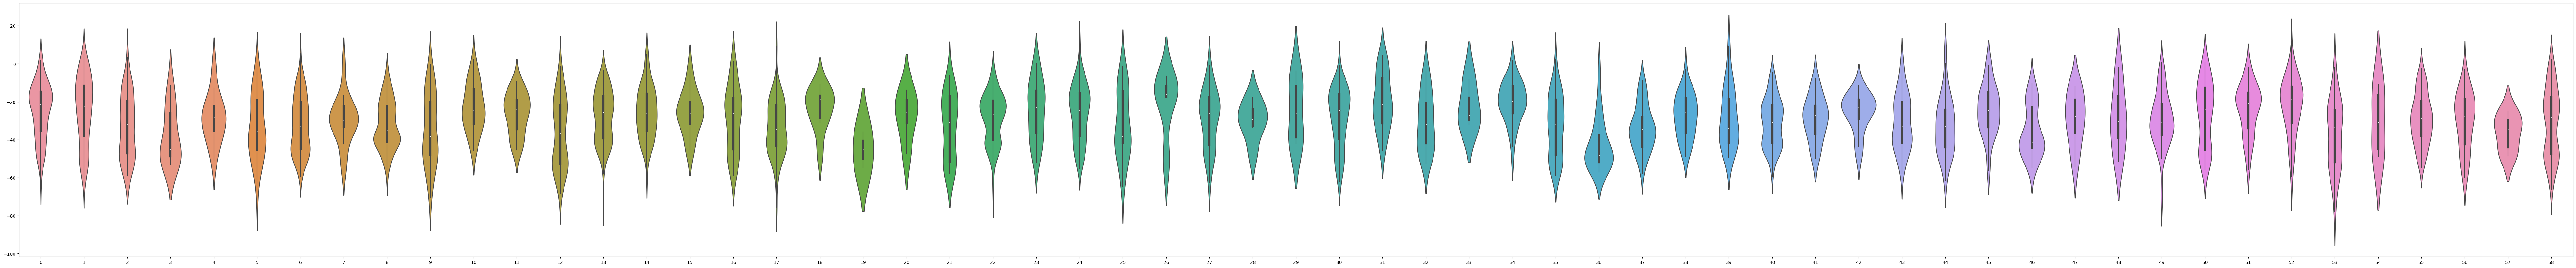

In [143]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df2_6)

<AxesSubplot:>

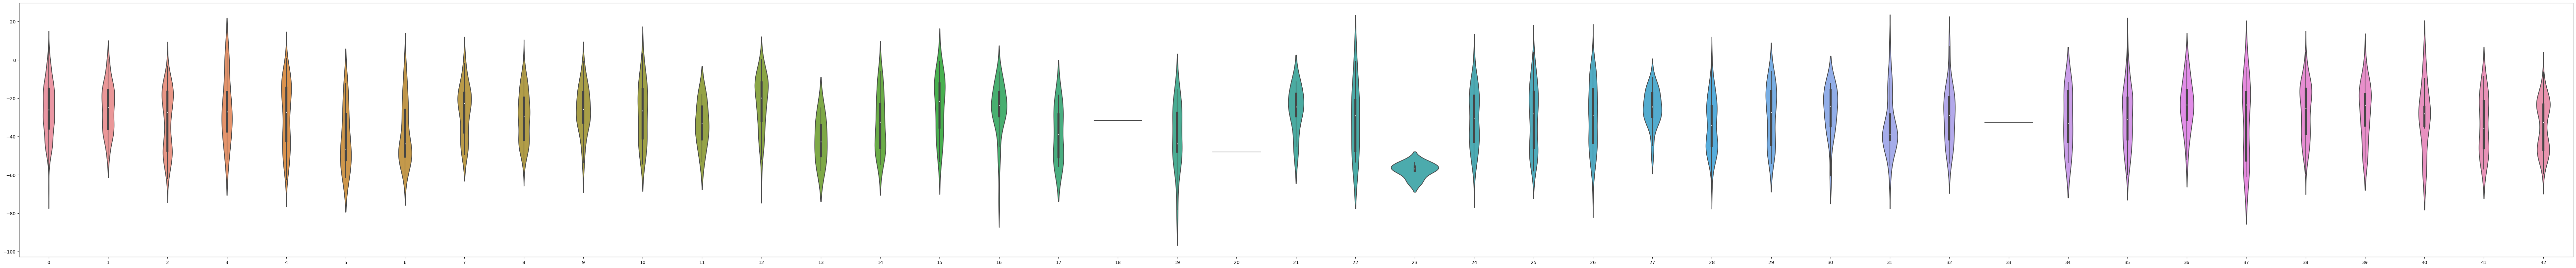

In [144]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df2_7)

## Extract Spectrogram features

#### An example of visualize Spectrogram  of a sample

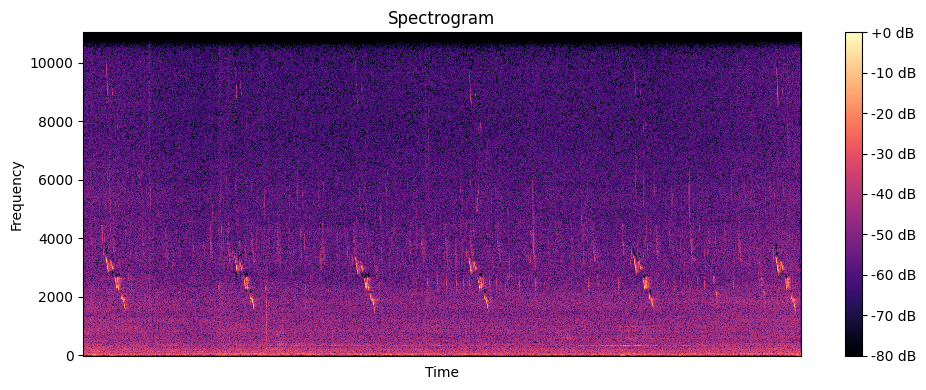

In [145]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


file_prefix = "/home/yangya/桌面/project/train_audio/"
idx = np.random.randint(0,len(data))
sample = data.iloc[idx]
path = file_prefix + sample["filename"]
label = sample["primary_label"]

# 读取音频文件
y, sr = librosa.load(path)

# 计算 spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# 可视化 spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [29]:
print(spec[0][0])

tensor([0.0005, 0.0028, 0.0041,  ..., 0.0017, 0.0051, 0.0003])


## The Visualization of average Amplitude distribution of each species

In [42]:
def dcalavgamplitude(i): 
    """
    display waveform of a given speech sample
    :param sample_name: speech sample name
    :param fs: sample frequency
    :return:
    """
    file_prefix = "/home/yangya/桌面/project/train_audio/"
    idx = i
    sample = data.iloc[idx]
    path = file_prefix + sample["filename"]
    samples, sr = librosa.load(path, sr=16000)
    # samples = samples[6000:16000]
    avg_amp =abs(samples).mean()
    return avg_amp
    # 
    # print(len(samples), sr)
    # time = np.arange(0, len(samples)) * (1.0 / sr)
    # plt.plot(time, samples)
    # plt.title("time v.s. amplitude")
    # plt.xlabel("time(s)")
    # plt.ylabel("Amplitude")
    # # plt.savefig("your dir\语音信号时域波形图", dpi=600)
    # plt.show()
    # 

In [66]:
data_avg = {}
for i in range(len(class_labels)):
    data_avg[class_labels[i]] = []
for i in range(len(data)):
    temp = dcalavgamplitude(i)
    label = data['primary_label'][i]
    data_avg[label].append(temp)


In [91]:
#data_1 = {'labels':all_class_labels,'amplitude':mean_avg}

#df_1 = pd.DataFrame(data_avg)
df_1=[]
for i in range(len(class_labels)):
    df_1.append(data_avg[class_labels[i]])

In [125]:

print(len(class_labels))
print(len(df_1))
df_2=df_1[:40]
df_3=df_1[41:80]
df_4=df_1[81:120]
df_5=df_1[121:160]
df_6=df_1[161:220]
df_7=df_1[221:264]

264
264


<AxesSubplot:>

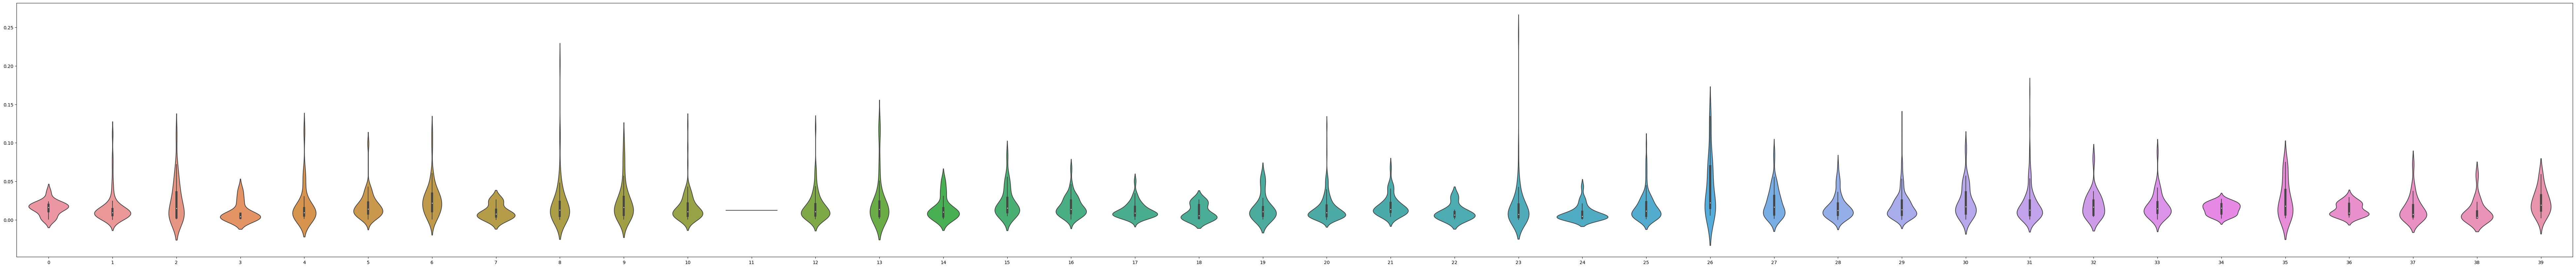

In [126]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df_2)

<AxesSubplot:>

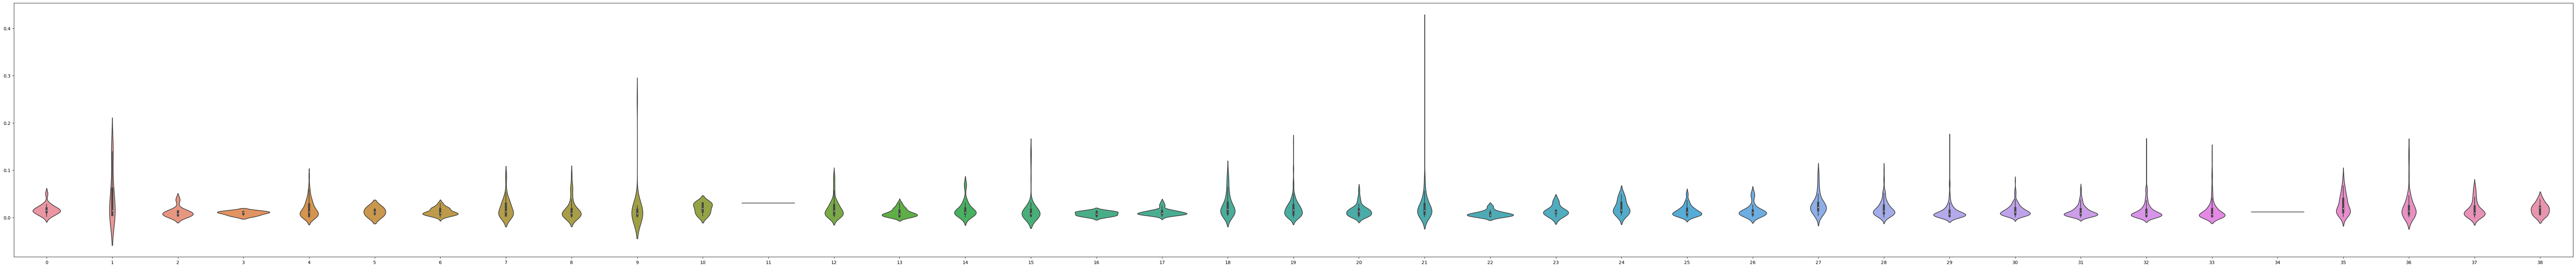

In [127]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df_3)

<AxesSubplot:>

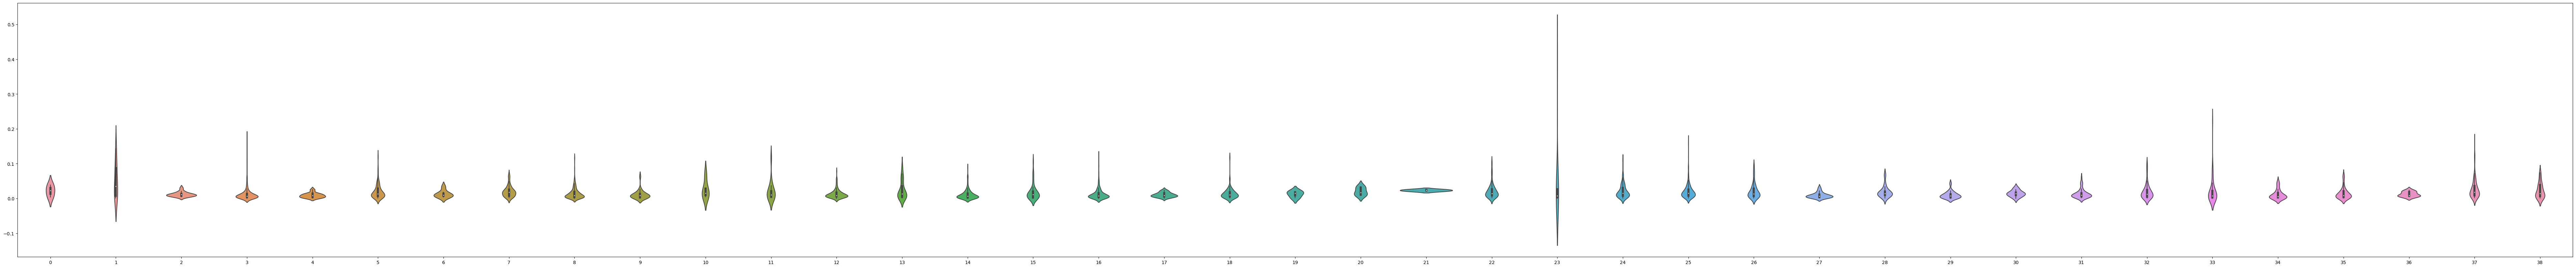

In [128]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df_4)

<AxesSubplot:>

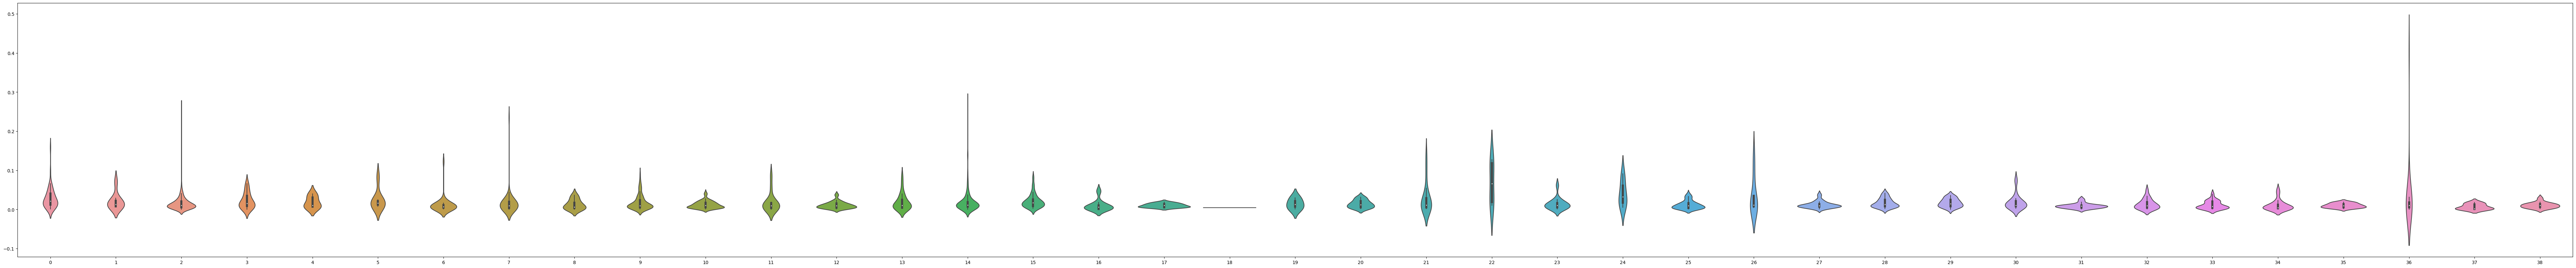

In [129]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df_5)

<AxesSubplot:>

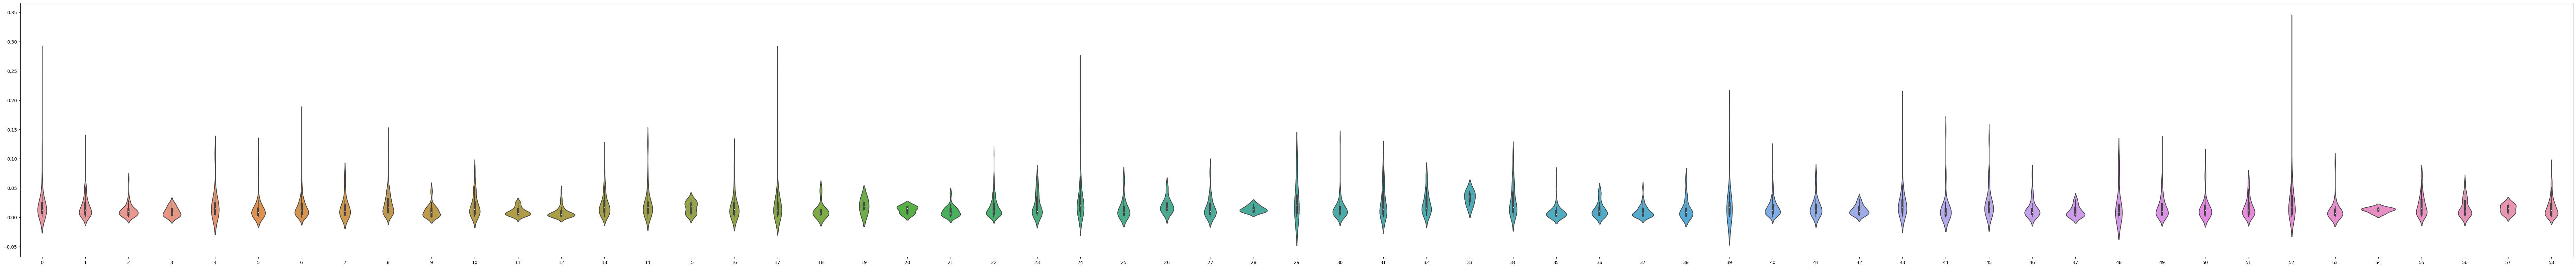

In [130]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df_6)

<AxesSubplot:>

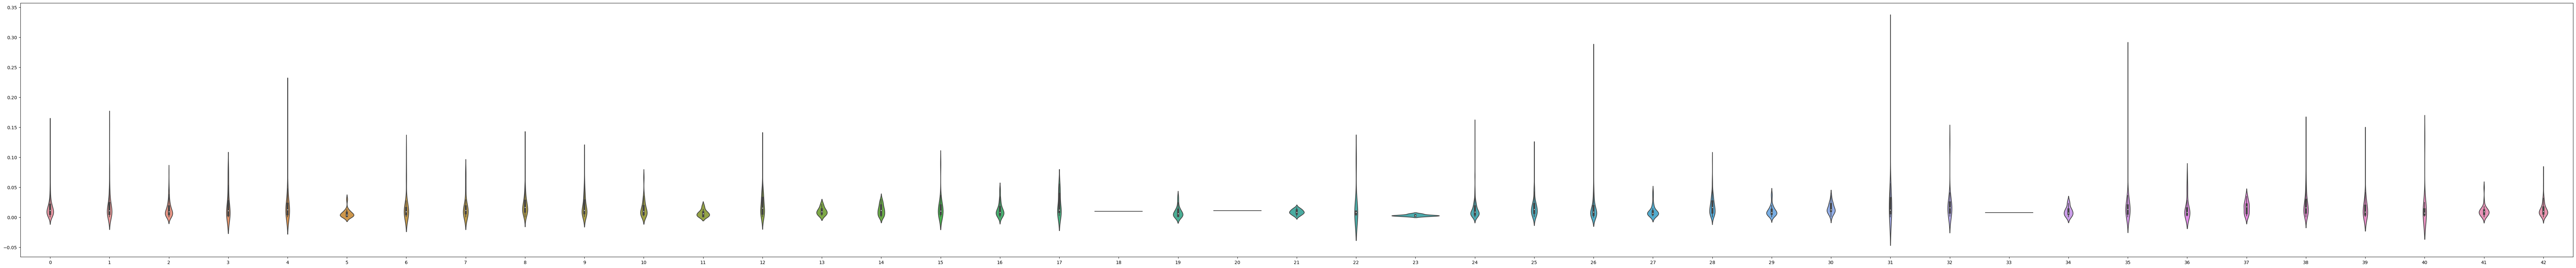

In [131]:
#m = [2,3,4,5,6,7,8,9]
_, ax = plt.subplots(figsize=(100,10))
#df_1 = pd.DataFrame(c)
sns.violinplot(ax=ax, data=df_7)